In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# Assuming your data is in CSV files
df = pd.read_csv('C:/source/MicroRTS/tournament_5/tournament.csv', skiprows=21, skipfooter=63)

C:\Users\tadhg\AppData\Local\Temp\ipykernel_20056\4048546853.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('C:/source/MicroRTS/tournament_5/tournament.csv', skiprows=21, skipfooter=63)


In [86]:
# Example: Handling missing values
df.dropna(inplace=True)

In [88]:
# Make a copy of the DataFrame with 'ai1' and 'ai2' switched
df_swapped = df.copy()
df_swapped[['ai1', 'ai2']] = df[['ai2', 'ai1']]
# Append the modified copy to the original DataFrame
df = pd.concat([df, df_swapped], ignore_index=True)

In [90]:
# read in the model names
ai_models = pd.read_csv('C:/source/MicroRTS/tournament_5/tournament.csv', usecols=[1], skiprows=1, nrows=8)
ai_models_list = ai_models.iloc[:,0].tolist()
# create a dict so we can use map()
model_names_dict = {i: name for i, name in enumerate(ai_models_list)}

In [92]:
# model names
df['ai1_name'] = df['ai1'].map(model_names_dict)
df['ai2_name'] = df['ai2'].map(model_names_dict)

# winner columns
df['winning_model'] = np.where(df['winner'] == 0, df['ai1'], np.where(df['winner'] == 1, df['ai2'], -1))
df['winning_model_name'] = df['winning_model'].map(model_names_dict)
# loser columns
df['losing_model'] = np.where(df['winner'] == 0, df['ai2'], np.where(df['winner'] == 1, df['ai2'], -1))
df['losing_model_name'] = df['losing_model'].map(model_names_dict)


In [94]:
df.head(20)

,iteration,map,ai1,ai2,time,winner,crashed,timedout,ai1_name,ai2_name,winning_model,winning_model_name,losing_model,losing_model_name
0,0,0,0,0,3525,0,-1,-1,WorkerRush(AStarPathFinding),WorkerRush(AStarPathFinding),0,WorkerRush(AStarPathFinding),0,WorkerRush(AStarPathFinding)
1,0,0,0,1,470,0,-1,-1,WorkerRush(AStarPathFinding),LightRush(AStarPathFinding),0,WorkerRush(AStarPathFinding),1,LightRush(AStarPathFinding)
2,0,0,0,2,370,0,-1,-1,WorkerRush(AStarPathFinding),HeavyRush(AStarPathFinding),0,WorkerRush(AStarPathFinding),2,HeavyRush(AStarPathFinding)
3,0,0,0,3,370,0,-1,-1,WorkerRush(AStarPathFinding),RangedRush(AStarPathFinding),0,WorkerRush(AStarPathFinding),3,RangedRush(AStarPathFinding)
4,0,0,0,4,3485,0,-1,-1,WorkerRush(AStarPathFinding),WorkerDefense(AStarPathFinding),0,WorkerRush(AStarPathFinding),4,WorkerDefense(AStarPathFinding)
5,0,0,0,5,365,0,-1,-1,WorkerRush(AStarPathFinding),LightDefense(AStarPathFinding),0,WorkerRush(AStarPathFinding),5,LightDefense(AStarPathFinding)
6,0,0,0,6,365,0,-1,-1,WorkerRush(AStarPathFinding),HeavyDefense(AStarPathFinding),0,WorkerRush(AStarPathFinding),6,HeavyDefense(AStarPathFinding)
7,0,0,0,7,365,0,-1,-1,WorkerRush(AStarPathFinding),RangedDefense(AStarPathFinding),0,WorkerRush(AStarPathFinding),7,RangedDefense(AStarPathFinding)
8,0,0,1,0,835,1,-1,-1,LightRush(AStarPathFinding),WorkerRush(AStarPathFinding),0,WorkerRush(AStarPathFinding),0,WorkerRush(AStarPathFinding)
9,0,0,1,1,1947,0,-1,-1,LightRush(AStarPathFinding),LightRush(AStarPathFinding),1,LightRush(AStarPathFinding),1,LightRush(AStarPathFinding)


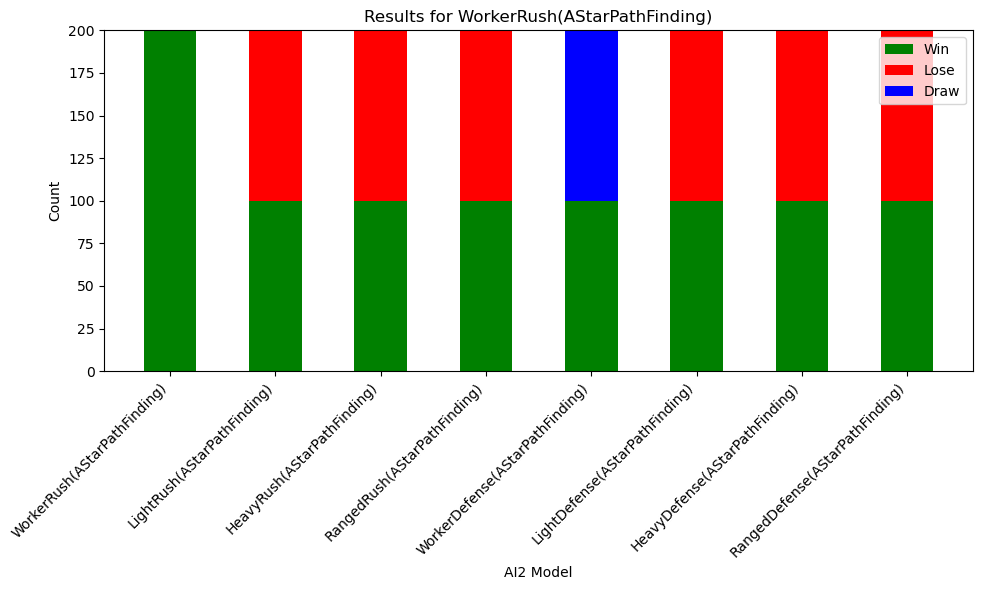

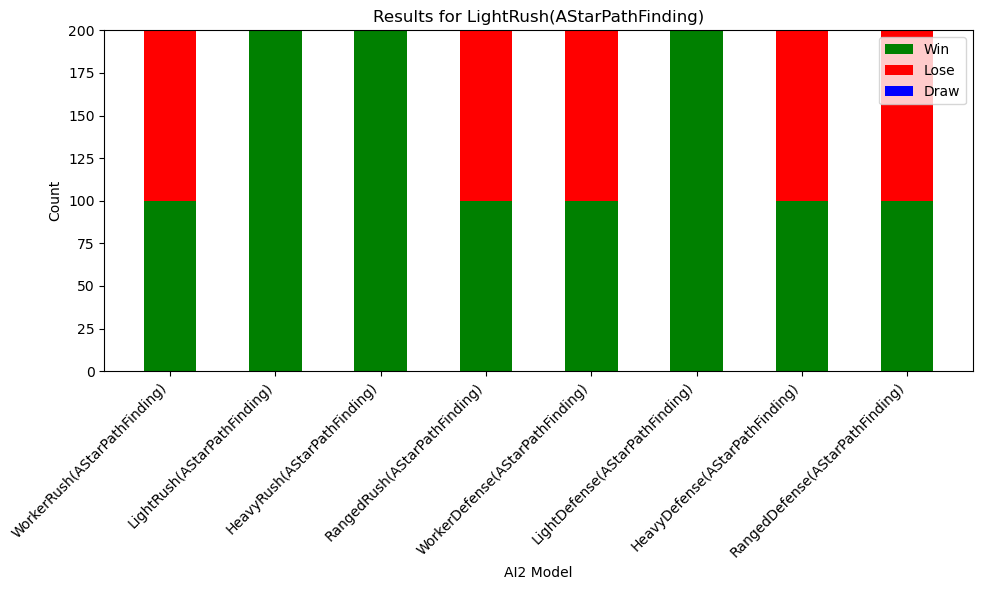

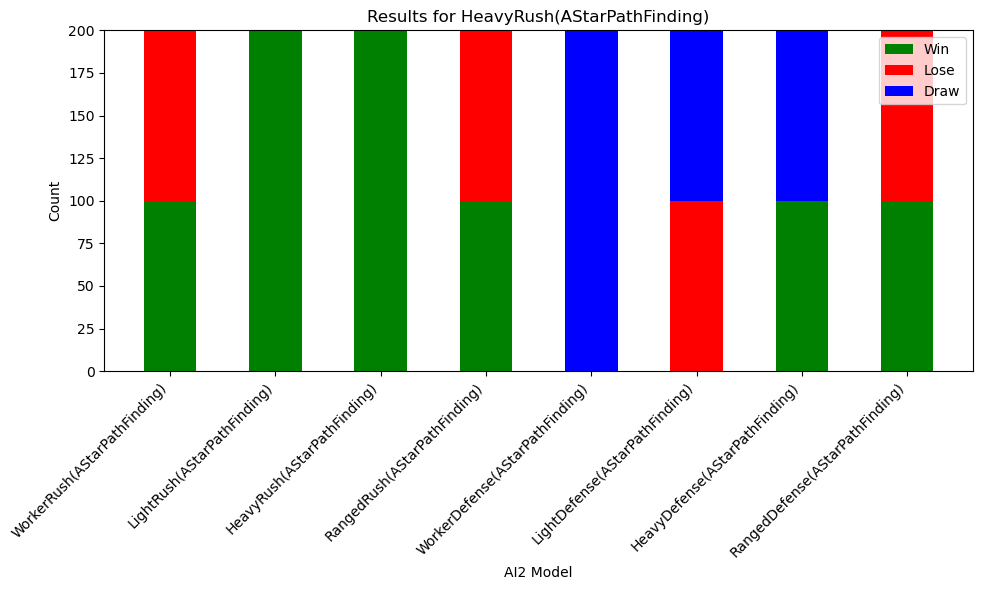

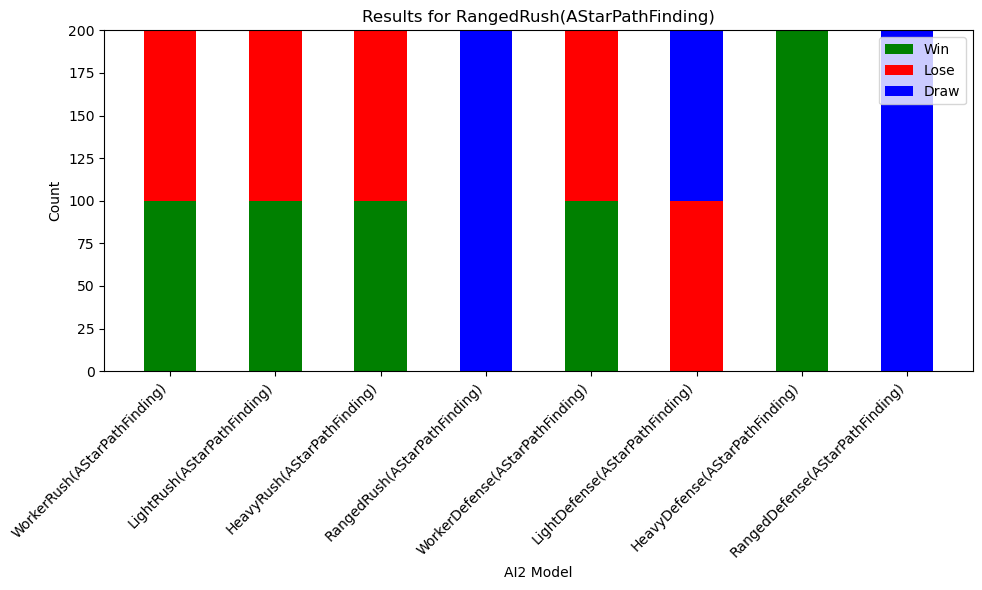

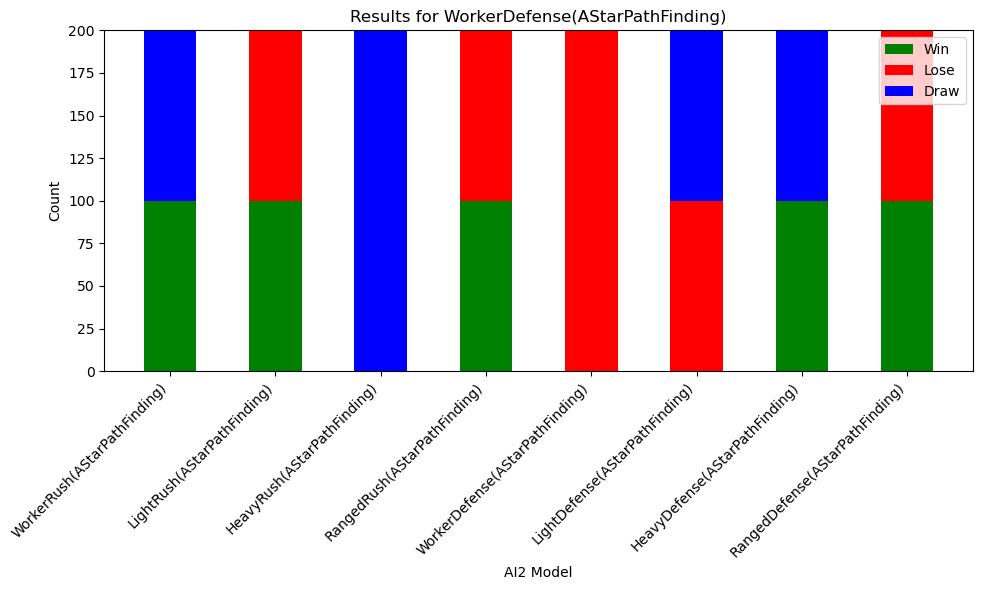

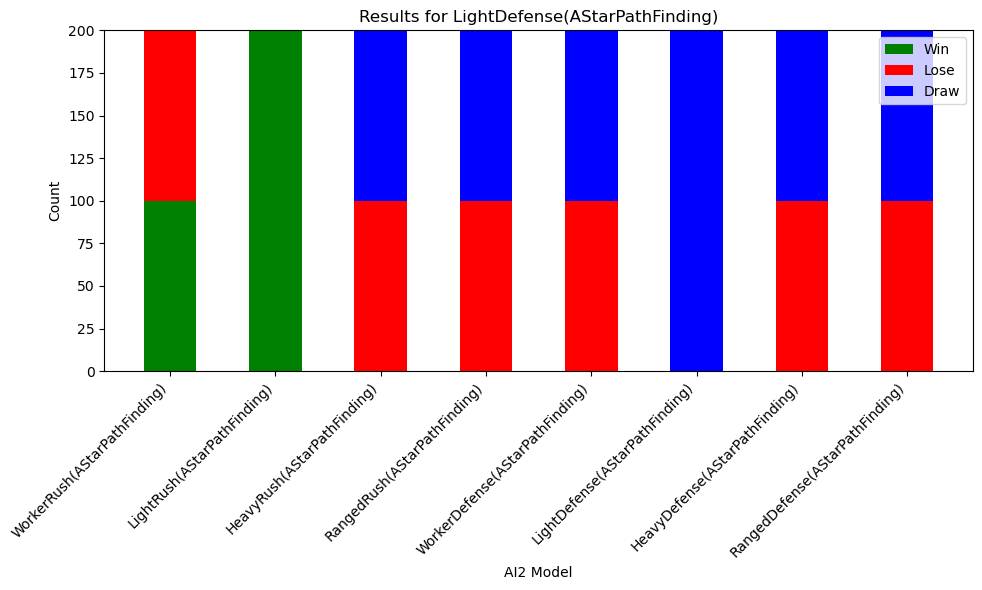

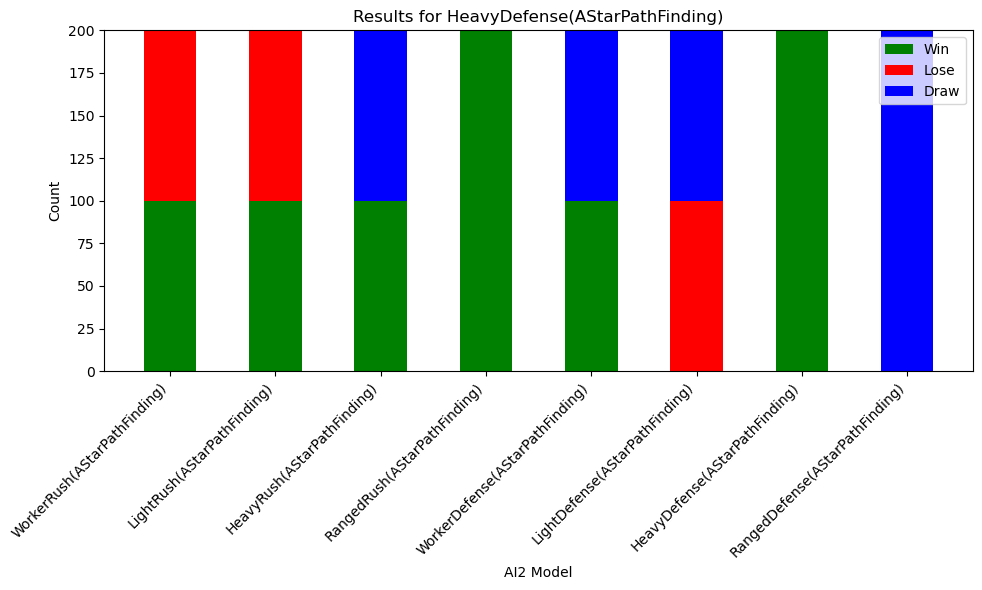

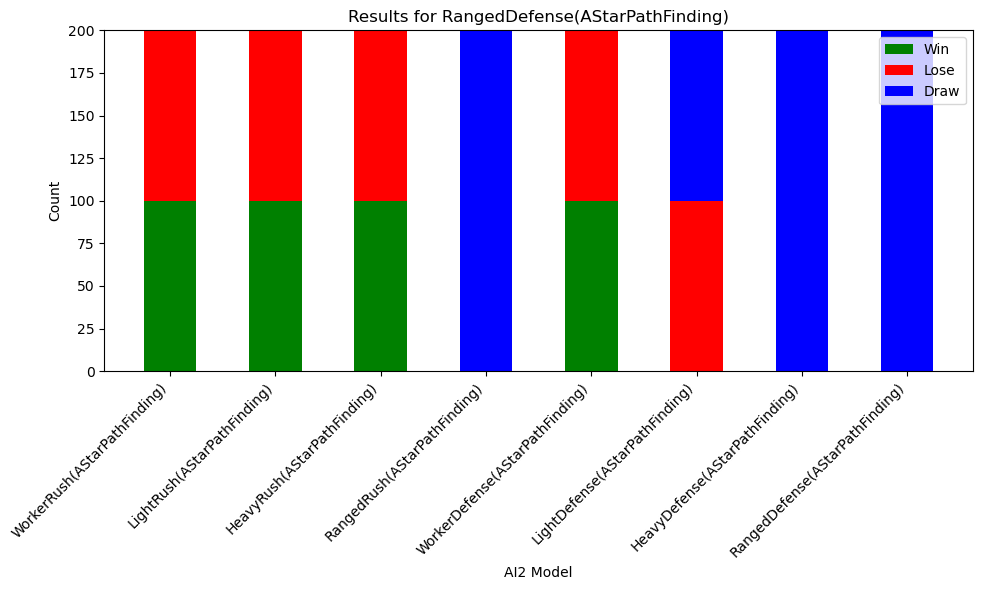

In [96]:
ai1_models = df['ai1_name'].unique()

for model in ai1_models:
    model_data = df[df['ai1_name'] == model]
    
    ai2_names = model_data['ai2_name'].unique()
    win_counts = []
    lose_counts = []
    draw_counts = []

    for ai2 in ai2_names:
        ai2_data = model_data[model_data['ai2_name'] == ai2]
        win_counts.append(len(ai2_data[ai2_data['winner'] == 0]))
        lose_counts.append(len(ai2_data[ai2_data['winner'] == 1]))
        draw_counts.append(len(ai2_data[ai2_data['winner'] == -1]))

    x = np.arange(len(ai2_names))  # the label locations

    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Creating the stacked bar chart
    ax.bar(x, win_counts, width=0.5, label='Win', color='green')
    ax.bar(x, lose_counts, width=0.5, label='Lose', color='red', bottom=win_counts)
    ax.bar(x, draw_counts, width=0.5, label='Draw', color='blue', bottom=np.array(win_counts) + np.array(lose_counts))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('AI2 Model')
    ax.set_ylabel('Count')
    ax.set_title(f'Results for {model}')
    ax.set_xticks(x)
    ax.set_xticklabels(ai2_names, rotation=45, ha='right')
    ax.legend()

    fig.tight_layout()

    plt.show()

In [98]:
df.column_names

AttributeError: 'DataFrame' object has no attribute 'column_names'

In [100]:
from sklearn.cluster import KMeans

# Example: Clustering agents based on performance metrics
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['metric1', 'metric2']])


KeyError: "None of [Index(['metric1', 'metric2'], dtype='object')] are in the [columns]"

C:\Users\tadhg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tadhg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\tadhg\AppData\Local\Temp\ipykernel_20056\1119030067.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['cluster'] = kmeans.fit_predict(clustering_data)


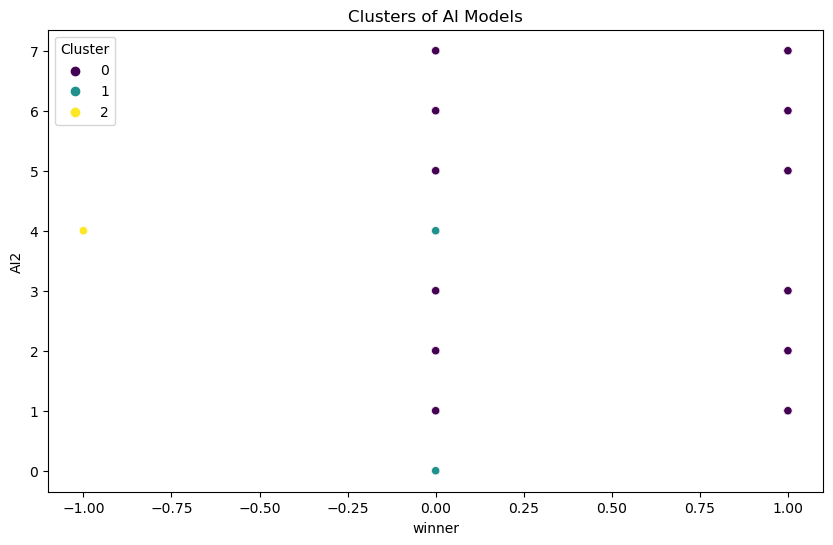

In [102]:
for index, name in enumerate(ai_models_list):

    model_data = df[df['ai1'] == index];

    
    # Select the relevant columns for clustering
    clustering_data = model_data[['ai1', 'ai2', 'time', 'winner']]
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    model_data['cluster'] = kmeans.fit_predict(clustering_data)
    
    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='winner', y='ai2', hue='cluster', data=model_data, palette='viridis')
    plt.title('Clusters of AI Models')
    plt.xlabel('winner')
    plt.ylabel('AI2')
    plt.legend(title='Cluster')
    plt.show()
    
    break;